# Upload File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
df = pd.read_csv("USvideos_modified.csv", sep=",")

df.columns

Index(['video_id', 'last_trending_date', 'publish_date', 'publish_hour',
       'category_id', 'channel_title', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'tag_appeared_in_title_count', 'tag_appeared_in_title', 'title', 'tags',
       'description', 'trend_day_count', 'trend.publish.diff',
       'trend_tag_highest', 'trend_tag_total', 'tags_count', 'subscriber'],
      dtype='object')

# General Clean up of Data

In [2]:
#filling in descriptions that were blank
df.description= df.description.fillna('No description provided')
df.tags= df.tags.fillna('')
df = df.dropna() #no information provided for subscribers to we eliminate those rows
df.shape

(4525, 23)

In [3]:
df.columns

Index(['video_id', 'last_trending_date', 'publish_date', 'publish_hour',
       'category_id', 'channel_title', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled',
       'tag_appeared_in_title_count', 'tag_appeared_in_title', 'title', 'tags',
       'description', 'trend_day_count', 'trend.publish.diff',
       'trend_tag_highest', 'trend_tag_total', 'tags_count', 'subscriber'],
      dtype='object')

## Linear Regression

In [4]:
from sklearn.linear_model import LinearRegression

def lin_reg_bp(df,var_1,var_2):
    
    X = np.array(df[[var_1]])
    y = np.array(df[var_2])
    
    # Model initialization
    regression_model = LinearRegression()
    
    # Fit the data(train the model)
    regression_model.fit(X, y)
    
    # Predict
    y_predicted = regression_model.predict(X)
    
    # Create dataframe for data
    df_var = pd.DataFrame({var_1:X.flatten(), var_2: y_predicted})
    
    print('\033[1m' + "Box Plot for Linear Regression",'\033[0m')
    
    # Plot
    boxplot = df_var.boxplot(column=[var_1, var_2])
    return boxplot

## Lasso Regression

In [5]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

#L1 Regularization Method
def las_reg_bp(df,var_1,var_2,a):
    
    X = np.array(df[[var_1]])
    y = np.array(df[var_2])
    
    # Model initialization
    regression_model = Lasso(alpha=a)
    
    # Fit the data(train the model)
    regression_model.fit(X, y)
    
    # Predict
    y_predicted = regression_model.predict(X)
    
    # Create dataframe for data
    df_var = pd.DataFrame({var_1:X.flatten(), var_2: y_predicted})
 
    print('\033[1m' + "Box Plot for Linear Regression with L1 Regularization",'\033[0m')

    # Plot
    boxplot = df_var.boxplot(column=[var_1, var_2])
    return boxplot
    
#Function determines best alpha value for lasso
def L_Alpha(df,var1,var2):
    
    x = np.array(df[[var1]])
    y = np.array(df[var2])

    regr_cv = LassoCV(alphas= [.1,1,10,100,1000,2000,3000,4000])
    model_cv = regr_cv.fit(x, y)
    print("lasso alpha:",model_cv.alpha_)

## Ridge Regression

In [6]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

#L2 Regularization Method
def rid_reg_bp(df,var_1,var_2,a):
    
    X = np.array(df[[var_1]])
    y = np.array(df[var_2])
    
    # Model initialization
    regression_model = Ridge(alpha=a)
    
    # Fit the data(train the model)
    regression_model.fit(X, y)
    
    # Predict
    y_predicted = regression_model.predict(X)
    
    # Create dataframe for data
    df_var = pd.DataFrame({var_1:X.flatten(), var_2: y_predicted})

    print('\033[1m' + "Box Plot for Linear Regression with L2 Regularization",'\033[0m')
    
    # Plot
    boxplot = df_var.boxplot(column=[var_1, var_2])
    return boxplot
    
#Function determines best alpha value for ridge
def R_Alpha(df,var1,var2):
    
    x = np.array(df[[var1]])
    y = np.array(df[var2])

    regr_cv = RidgeCV(alphas= [1,10,100,1000,2000,3000,4000])
    model_cv = regr_cv.fit(x, y)
    print("ridge alpha:",model_cv.alpha_)

### trend_day_count vs trend.publish.diff

In [7]:
L_Alpha(df,'trend_day_count','trend.publish.diff')
R_Alpha(df,'trend_day_count','trend.publish.diff')

lasso alpha: 1.0
ridge alpha: 2000


Box Plot for Linear Regression 


<AxesSubplot:>

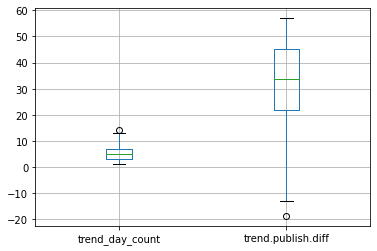

In [8]:
lin_reg_bp(df,'trend_day_count','trend.publish.diff')

Box Plot for Linear Regression with L1 Regularization 


<AxesSubplot:>

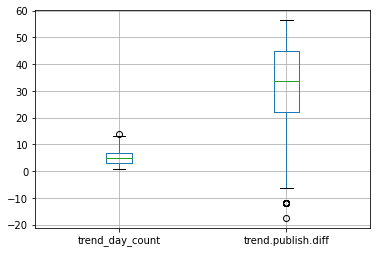

In [9]:
las_reg_bp(df,'trend_day_count','trend.publish.diff',1)

Box Plot for Linear Regression with L2 Regularization 


<AxesSubplot:>

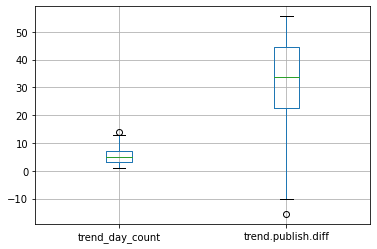

In [10]:
rid_reg_bp(df,'trend_day_count','trend.publish.diff',2000)